In [10]:
import matplotlib.pyplot as plt
from tensorflow import keras

from data import get_datasets
from utils import plot_slice, plot_animated_volume

%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 7]

In [11]:
autoencoder = keras.models.load_model("models/20201001-180937/")
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 31, 16, 16, 64)    69664     
_________________________________________________________________
sequential_1 (Sequential)    (None, 248, 128, 128, 1)  179841    
Total params: 249,505
Trainable params: 249,505
Non-trainable params: 0
_________________________________________________________________


In [12]:
train_dataset, val_dataset, test_dataset = get_datasets()
test_dataset

<BatchDataset shapes: (None, None, None, None, 1), types: tf.float32>

In [39]:
original = next(iter(val_dataset.skip(1)))
encoder_out = autoencoder.layers[0](original)
decoder_out = autoencoder.layers[1](encoder_out)
batch_index = 0

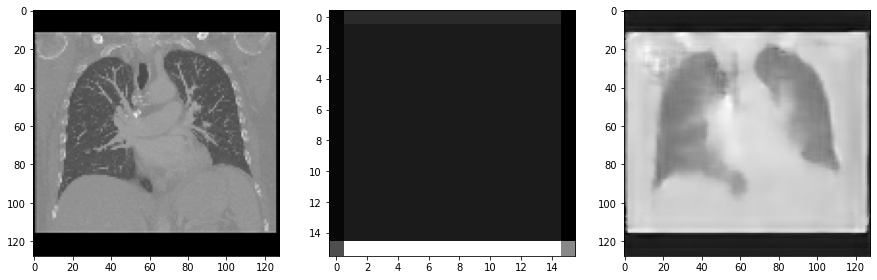

In [40]:
z_index = 20
fig, ax = plt.subplots(ncols=3)
plot_slice(original, batch_index, z_index, ax[0])
plot_slice(encoder_out, batch_index, encoder_out.shape[1] // 3, ax[1])
plot_slice(decoder_out, batch_index, z_index, ax[2])

In [41]:
plot_animated_volume(original, batch_index)

In [35]:
plot_animated_volume(encoder_out, batch_index, fps=10)

In [36]:
plot_animated_volume(decoder_out, batch_index)